In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

import os
for dirname, _, filenames in os.walk('Project.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

In [2]:
data = pd.read_csv("Project.csv",encoding='latin-1')
data.head()

,0,1553708563,Sat Apr 18 15:00:01 PDT 2009,NO_QUERY,offspeed,@goconfidently
0,0,1553708663,Sat Apr 18 15:00:02 PDT 2009,NO_QUERY,kidcudiluva10,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!
1,0,1553708875,Sat Apr 18 15:00:06 PDT 2009,NO_QUERY,ohmygodroysh,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites
2,0,1553709188,Sat Apr 18 15:00:06 PDT 2009,NO_QUERY,MELODYSNA,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her"
3,0,1553709415,Sat Apr 18 15:00:09 PDT 2009,NO_QUERY,jdfx3,Where's my hint of video?! #asot400
4,0,1553709835,Sat Apr 18 15:00:11 PDT 2009,NO_QUERY,flood710,birthday party turned into puke fest for my 4 year old


In [3]:
print('Length of the dataset is:',len(data))
data.shape

Length of the dataset is: 69999


(69999, 6)

In [4]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,1553708663,Sat Apr 18 15:00:02 PDT 2009,NO_QUERY,kidcudiluva10,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!
1,0,1553708875,Sat Apr 18 15:00:06 PDT 2009,NO_QUERY,ohmygodroysh,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites
2,0,1553709188,Sat Apr 18 15:00:06 PDT 2009,NO_QUERY,MELODYSNA,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her"
3,0,1553709415,Sat Apr 18 15:00:09 PDT 2009,NO_QUERY,jdfx3,Where's my hint of video?! #asot400
4,0,1553709835,Sat Apr 18 15:00:11 PDT 2009,NO_QUERY,flood710,birthday party turned into puke fest for my 4 year old


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   target     69999 non-null  int64 
 1   ids        69999 non-null  int64 
 2   date       69999 non-null  object
 3   flag       69999 non-null  object
 4   user       69999 non-null  object
 5   TweetText  69999 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [6]:
data.isnull().sum()

target       0
ids          0
date         0
flag         0
user         0
TweetText    0
dtype: int64

In [7]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [8]:
data.head()

,target,TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her"
3,0,Where's my hint of video?! #asot400
4,0,birthday party turned into puke fest for my 4 year old


# Data Cleaning

Removing Twitter Handles (@user)

In [9]:
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her","rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her"
3,0,Where's my hint of video?! #asot400,Where's my hint of video?! #asot400
4,0,birthday party turned into puke fest for my 4 year old,birthday party turned into puke fest for my 4 year old


Removing links

In [10]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her","rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her"
3,0,Where's my hint of video?! #asot400,Where's my hint of video?! #asot400
4,0,birthday party turned into puke fest for my 4 year old,birthday party turned into puke fest for my 4 year old


Removing Punctuations, Numbers, and Special Characters

In [11]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,xomileycyrusxo My sister may have a kidney infection PRAY HER
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her",rocsidiaz done Is Fantasia really on Twitter Noticed she sent you a message but she has no followers I will add her it it s her
3,0,Where's my hint of video?! #asot400,Where s my hint of video asot
4,0,birthday party turned into puke fest for my 4 year old,birthday party turned into puke fest for my year old


In [12]:
data['target'] = data['target'].replace(4,1)

In [13]:
data['target'].unique()

array([0, 1])

Remove stop words

In [16]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [17]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [18]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,xomileycyrusxo sister may kidney infection pray
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,like eventully saw boat startd shoutin n already disqualified looked like gobshites
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her",rocsidiaz done fantasia really twitter noticed sent message followers add
3,0,Where's my hint of video?! #asot400,hint video asot
4,0,birthday party turned into puke fest for my 4 year old,birthday party turned puke fest year old


Text Tokenization and Normalization

In [19]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,"[xomileycyrusxo, sister, may, kidney, infection, pray]"
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,"[like, eventully, saw, boat, startd, shoutin, n, already, disqualified, looked, like, gobshites]"
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her","[rocsidiaz, done, fantasia, really, twitter, noticed, sent, message, followers, add]"
3,0,Where's my hint of video?! #asot400,"[hint, video, asot]"
4,0,birthday party turned into puke fest for my 4 year old,"[birthday, party, turned, puke, fest, year, old]"


In [20]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,"[xomileycyrusxo, sister, may, kidney, infect, pray]"
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,"[like, eventulli, saw, boat, startd, shoutin, n, alreadi, disqualifi, look, like, gobshit]"
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her","[rocsidiaz, done, fantasia, realli, twitter, notic, sent, messag, follow, add]"
3,0,Where's my hint of video?! #asot400,"[hint, video, asot]"
4,0,birthday party turned into puke fest for my 4 year old,"[birthday, parti, turn, puke, fest, year, old]"


Now let’s stitch these tokens back together

In [21]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,TweetText,Clean_TweetText
0,0,@xomileycyrusxo My sister may have a kidney infection PRAY 4 HER!,xomileycyrusxo sister may kidney infect pray
1,0,so like eventully we saw his boat so we startd shoutin n what not but it they had already been disqualified so we looked like gobshites,like eventulli saw boat startd shoutin n alreadi disqualifi look like gobshit
2,0,"@rocsidiaz done. Is Fantasia really on Twitter? Noticed she sent you a message, but she has no followers. I will add her it it's her",rocsidiaz done fantasia realli twitter notic sent messag follow add
3,0,Where's my hint of video?! #asot400,hint video asot
4,0,birthday party turned into puke fest for my 4 year old,birthday parti turn puke fest year old


Removing small words

In [22]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()
data.shape

(69999, 3)

In [23]:
from wordcloud import WordCloud 

Data Vizualisation

In this section we will visualize the tweets using wordclouds. A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

What are the most common words in the entire dataset?

(69999,)

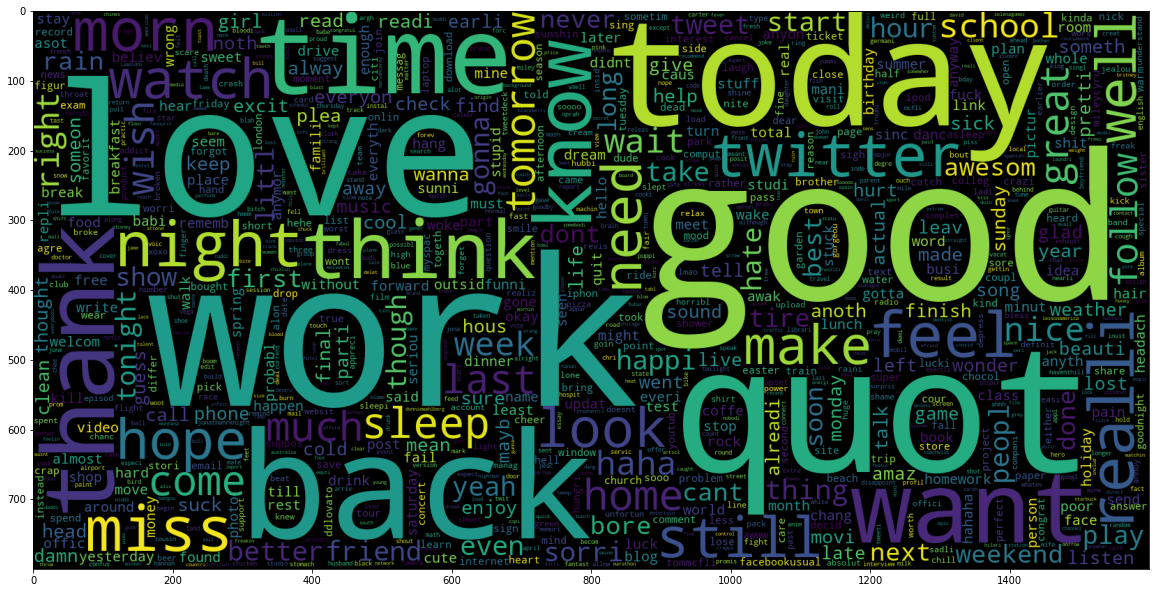

In [24]:
all_words = data['Clean_TweetText']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(all_words))
plt.figure(figsize = (20,20))
plt.imshow(wc)
all_words.shape

What are the most common words in the dataset for Positive and Depressive tweets, respectively?

(35001,)

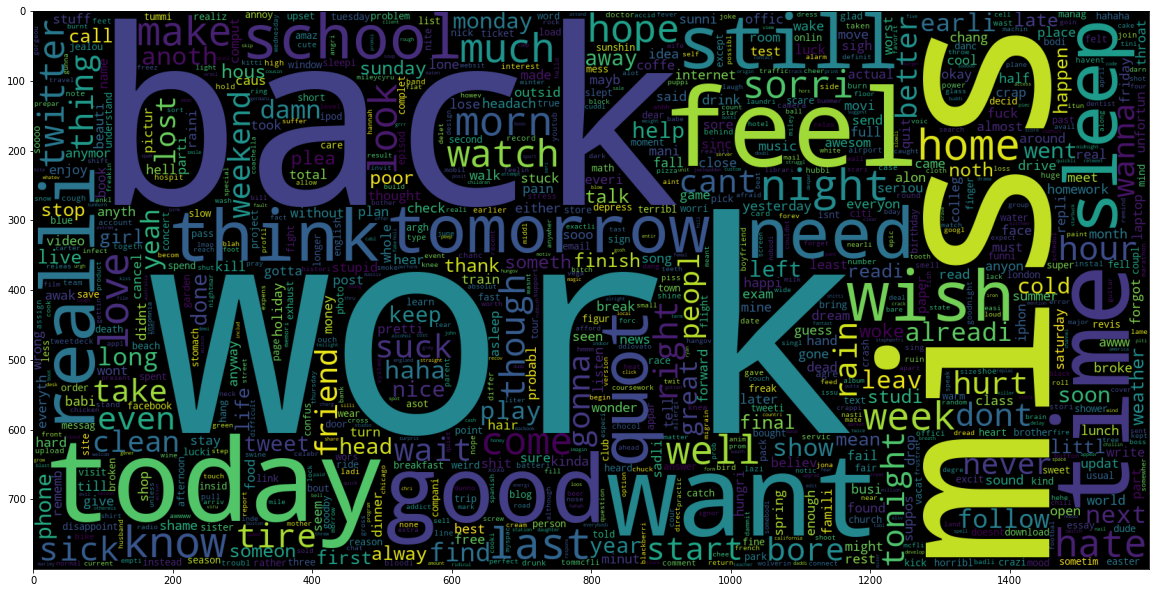

In [25]:
data_neg = data['Clean_TweetText'][:35001]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
data_neg.shape

(34998,)

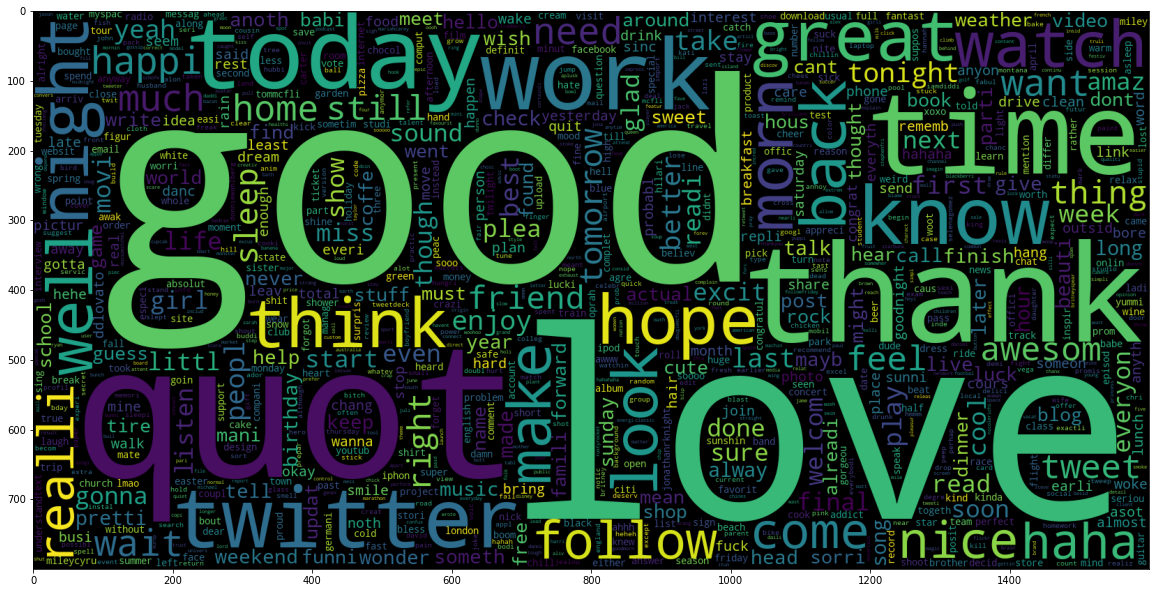

In [26]:
data_pos = data['Clean_TweetText'][35001:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
data_pos.shape

# Model building

In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(69999, 50311)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=40)

Model Training

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
xgbc = XGBClassifier(max_depth=6, n_estimators=500, nthread= 3)
xgbc.fit(X_train,y_train)
xgb_pred_train = xgbc.predict(X_train)
xgb_pred_test = xgbc.predict(X_test)
print('Training accuracy:',accuracy_score(xgb_pred_train,y_train))
print('Testing accuracy:',accuracy_score(xgb_pred_test,y_test))



Training accuracy: 0.7759781424668297
Testing accuracy: 0.7352857142857143


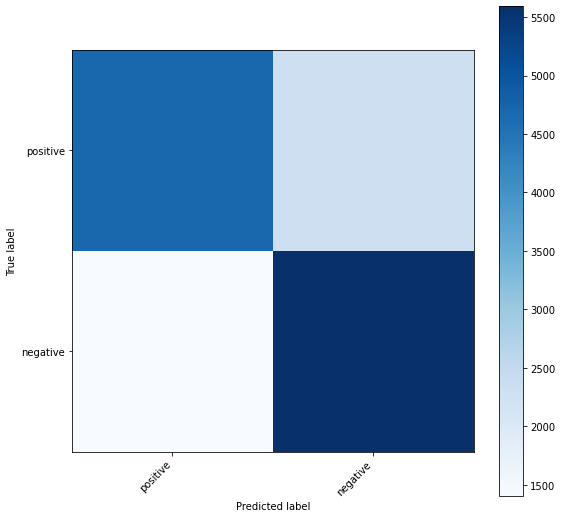

In [34]:
#Confusion matrix
    
cm = confusion_matrix(y_test, xgb_pred_test)
display_labels=['True Neg','False Pos', 'False Neg','True Pos']
class_names=['positive','negative']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = class_names)
    
fig, ax = plt.subplots(figsize = (9,9))
disp.plot(ax = ax, cmap=plt.cm.Blues,include_values=False);
ax.set_xticklabels(class_names,rotation=45, ha='right');

In [43]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)
predict_rf_train = rf.predict(X_train)
predict_rf_test = rf.predict(X_test)
print('Training accuracy:',accuracy_score(predict_rf_train,y_train))
print('Testing accuracy:',accuracy_score(predict_rf_test,y_test))

Training accuracy: 0.9926427257629601
Testing accuracy: 0.7156428571428571


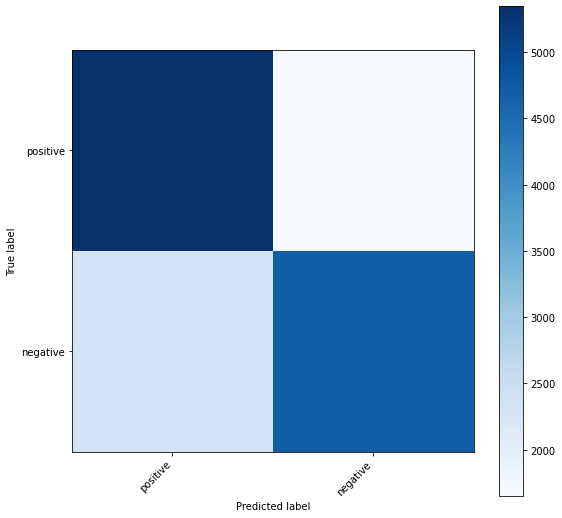

In [44]:
#Confusion matrix
    
cm = confusion_matrix(y_test, predict_rf_test)
display_labels=['True Neg','False Pos', 'False Neg','True Pos']
class_names=['positive','negative']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = class_names)
    
fig, ax = plt.subplots(figsize = (9,9))
disp.plot(ax = ax, cmap=plt.cm.Blues,include_values=False);
ax.set_xticklabels(class_names,rotation=45, ha='right');

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict_lr_train = lr.predict(X_train)
predict_lr_test = lr.predict(X_test)
print('Training accuracy:',accuracy_score(predict_lr_train,y_train))
print('Testing accuracy:',accuracy_score(predict_lr_test,y_test))

Training accuracy: 0.8609439454275969
Testing accuracy: 0.7349285714285714


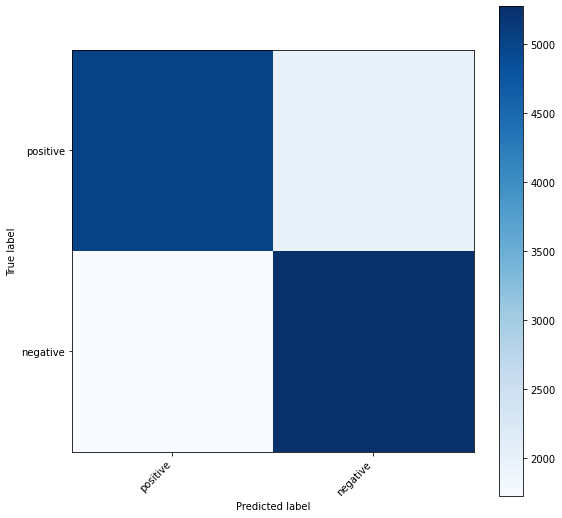

In [36]:
#Confusion matrix
    
cm = confusion_matrix(y_test, predict_lr_test)
display_labels=['True Neg','False Pos', 'False Neg','True Pos']
class_names=['positive','negative']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = class_names)
    
fig, ax = plt.subplots(figsize = (9,9))
disp.plot(ax = ax, cmap=plt.cm.Blues,include_values=False);
ax.set_xticklabels(class_names,rotation=45, ha='right');

In [37]:
svc = svm.SVC()
svc.fit(X_train,y_train)
predict_svc_train = svc.predict(X_train)
predict_svc_test = svc.predict(X_test)
print('Training accuracy:',accuracy_score(predict_svc_train,y_train))
print('Testing accuracy:',accuracy_score(predict_svc_test,y_test))

Training accuracy: 0.9083733638100681
Testing accuracy: 0.7394285714285714


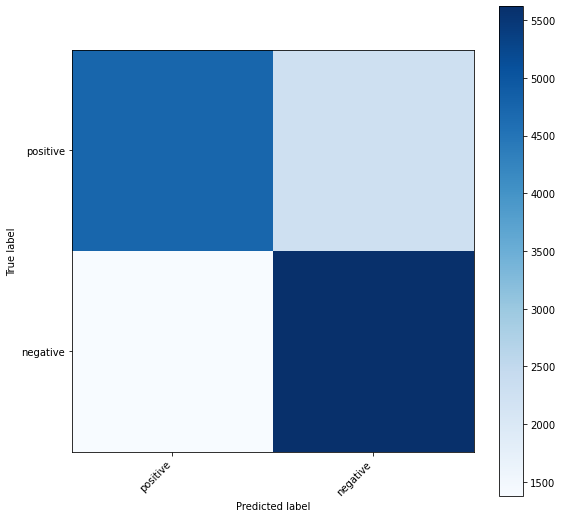

In [38]:
#Confusion matrix
    
cm = confusion_matrix(y_test, predict_svc_test)
display_labels=['True Neg','False Pos', 'False Neg','True Pos']
class_names=['positive','negative']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = class_names)
    
fig, ax = plt.subplots(figsize = (9,9))
disp.plot(ax = ax, cmap=plt.cm.Blues,include_values=False);
ax.set_xticklabels(class_names,rotation=45, ha='right');

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('Training accuracy:',accuracy_score(y_train,y_pred_train))
print('Testing accuracy:',accuracy_score(y_test,y_pred_test))

Training accuracy: 0.9926427257629601
Testing accuracy: 0.6772857142857143


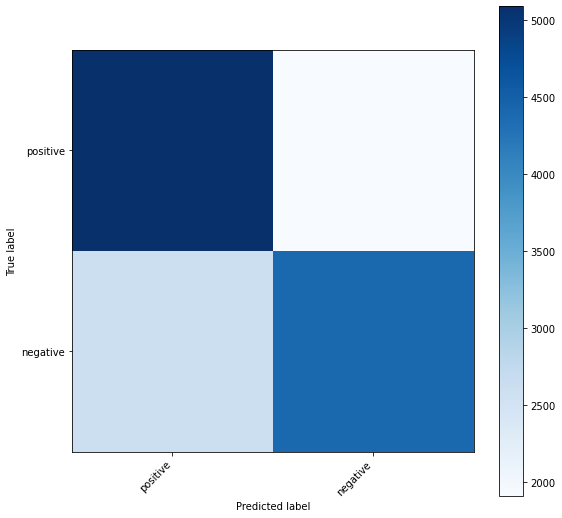

In [40]:
#Confusion matrix
    
cm = confusion_matrix(y_test, y_pred_test)
display_labels=['True Neg','False Pos', 'False Neg','True Pos']
class_names=['positive','negative']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = class_names)
    
fig, ax = plt.subplots(figsize = (9,9))
disp.plot(ax = ax, cmap=plt.cm.Blues,include_values=False);
ax.set_xticklabels(class_names,rotation=45, ha='right');

<AxesSubplot:xlabel='target', ylabel='count'>

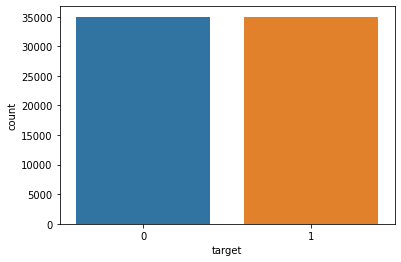

In [41]:
import seaborn as sns
sns.countplot(x='target', data=data)

# Conclusion
### Among all the Classifiers We have got the best accuracy for the XG-Boost Classifier.